In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import matplotlib
import sklearn

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

In [3]:
horse_run = pd.read_csv("../data/horse_to.csv", index_col=0)
horse_run.isna().sum()

/tmp/ipykernel_173208/2621305358.py:1: DtypeWarning: Columns (4,36) have mixed types. Specify dtype option on import or set low_memory=False.
  horse_run = pd.read_csv("../data/horse_to.csv", index_col=0)


경마장            0
경주일자           0
경주번호           0
경주거리           0
경주등급           0
              ..
부경G6F통과누적기록    0
부경G4F통과누적기록    0
부경G3F통과누적기록    0
부경G2F통과누적기록    0
부경G1F통과누적기록    0
Length: 90, dtype: int64

In [4]:
horse_run.dropna(axis=1, inplace=True)
horse_run.head()

,경마장,경주일자,경주번호,경주거리,경주등급,날씨,주로상태(함수율),착순,출주번호,마명,...,부경2F-G통과기록,부경3F-G통과기록,부경1F-G통과기록,부경S1F통과누적기록,부경G8F통과누적기록,부경G6F통과누적기록,부경G4F통과누적기록,부경G3F통과누적기록,부경G2F통과누적기록,부경G1F통과누적기록
1,제주,20230701,1,800,제6등급,흐림,포화 (18%),1,9,한백제왕,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,제주,20230701,1,800,제6등급,흐림,포화 (18%),2,2,명의로운,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,제주,20230701,1,800,제6등급,흐림,포화 (18%),3,3,번개의꿈,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,제주,20230701,1,800,제6등급,흐림,포화 (18%),4,6,고차원,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,제주,20230701,1,800,제6등급,흐림,포화 (18%),5,1,위너고,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
horse_run = horse_run.iloc[:,0:-43]
horse_run.columns

Index(['경마장', '경주일자', '경주번호', '경주거리', '경주등급', '날씨', '주로상태(함수율)', '착순', '출주번호',
       '마명', '마번', '출신국가', '국산외산구분', '마필연령', '마필성별', '경주기록(초)', '경주마통산1착횟수',
       '경주마통산2착횟수', '경주마통산출전횟수', '경주마최근1년1착횟수', '경주마최근1년2착횟수', '경주마최근1년출전횟수',
       '마체중및증감', '부담중량', '기수명', '기수번호', '기수연령', '기수경력(년)', '기수통산1착횟수',
       '기수통산2착횟수', '기수통산출전횟수', '기수최근1년간1착횟수', '기수최근1년간2착횟수', '기수최근1년간출전횟수'],
      dtype='object')

In [6]:
horse_run = horse_run[horse_run["경주거리"] != '-']
horse_run["경주거리"] = horse_run["경주거리"].astype("int")

In [7]:
humid = [int(j.replace('%)',''))/100 for _,j in horse_run["주로상태(함수율)"].str.split('(')[:]]
horse_run["습도"] = humid

In [8]:
horse_run["출신국가"]
horse_run = pd.concat([horse_run,pd.get_dummies(horse_run["출신국가"], drop_first=True)],axis=1)
horse_run = pd.concat([horse_run,pd.get_dummies(horse_run["마필성별"], drop_first=True)],axis=1)


In [9]:
weights =[]
diffs = []
for weight, diff in horse_run["마체중및증감"].str.split('('):
    weights.append(int(weight))
    if diff.replace(')','') == '':
        diffs.append(0)
    else:
        diffs.append(int(diff.replace(')','')))

In [10]:
horse_run["무게"] = weights
horse_run["무게 증감량"] = diffs

In [11]:
horse_run = horse_run.drop(columns=["경주기록(초)","마체중및증감","주로상태(함수율)","마필성별","출신국가","경마장","경주일자","마번","마명","경주등급","날씨","국산외산구분","기수명"])

horse_run = horse_run[horse_run["착순"] < 17]
horse_run.loc[horse_run["착순"] > 1, "착순"] = 0

In [12]:
# ## 데이터를 standard scaling 해보자
    
# # 일단 인트값으로만 테스트 
# horse_int = horse_run.select_dtypes("int")
    
# sta = StandardScaler()
# horse_scaling = sta.fit_transform(horse_int)
    
# horse_pca = PCA(n_components = 2).fit_transform(horse_scaling)
# pca_df = pd.DataFrame(data = horse_pca, columns=[0,1])
    
# features = horse_int.columns
    
# cmap = plt.cm.get_cmap('viridis', 41)
    
# # 그래프 그리기
# plt.figure(figsize=(8, 6))
# for i, (x, y) in enumerate(zip(pca_df[0], pca_df[1])):
#     plt.scatter(x, y, cmap=[i], edgecolor='k')  # 레이블은 일부만 표시
    
# plt.title('PCA of Horse Run Data')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.grid(True)
# plt.show()

In [13]:
!pip install xgboost
!pip install imblearn

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

x_data = horse_run.drop(columns="착순")
y_data = horse_run["착순"]
    
rus = RandomUnderSampler(random_state=0)
x_rus, y_rus = rus.fit_resample(x_data, y_data)
    
# smoenn = SMOTEENN(random_state=0)
# x_smoenn, y_smoenn = smoenn.fit_resample(x_data, y_data)

    

    
x_train, x_test, y_train, y_test = train_test_split(x_rus, 
                                                    y_rus, 
                                                    test_size=0.30,
                                                    random_state = 97)
    
model = RandomForestClassifier()
model.fit(x_train,y_train)
    
pred = model.predict(x_test)
print("정확도",metrics.accuracy_score(pred, y_test))
print("confusion_matrix",confusion_matrix(y_test, pred))
print("classification_report")
print(classification_report(y_test, pred))
# model.feature_importances_

정확도 0.7076174112256587
confusion_matrix [[1137  568]
 [ 453 1334]]
classification_report
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1705
           1       0.70      0.75      0.72      1787

    accuracy                           0.71      3492
   macro avg       0.71      0.71      0.71      3492
weighted avg       0.71      0.71      0.71      3492



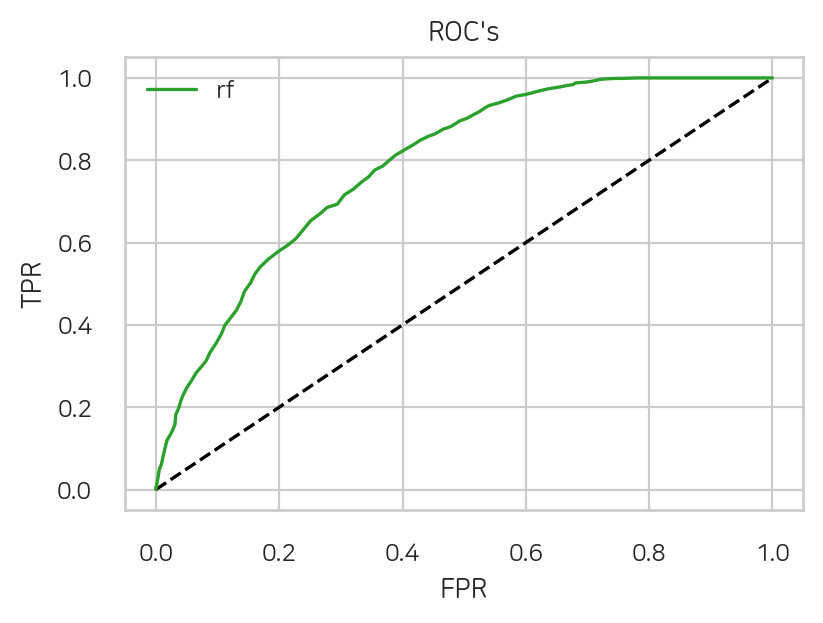

In [15]:
rf_fpr, rf_tpr, rf_thr = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    
fig, ax = plt.subplots(figsize=(4,3))
ax.plot([0,1],[0,1],"k--")
ax.plot(rf_fpr, rf_tpr, label="rf", color = "tab:green")
ax.set(xlabel="FPR", ylabel="TPR", title="ROC's")
ax.legend();

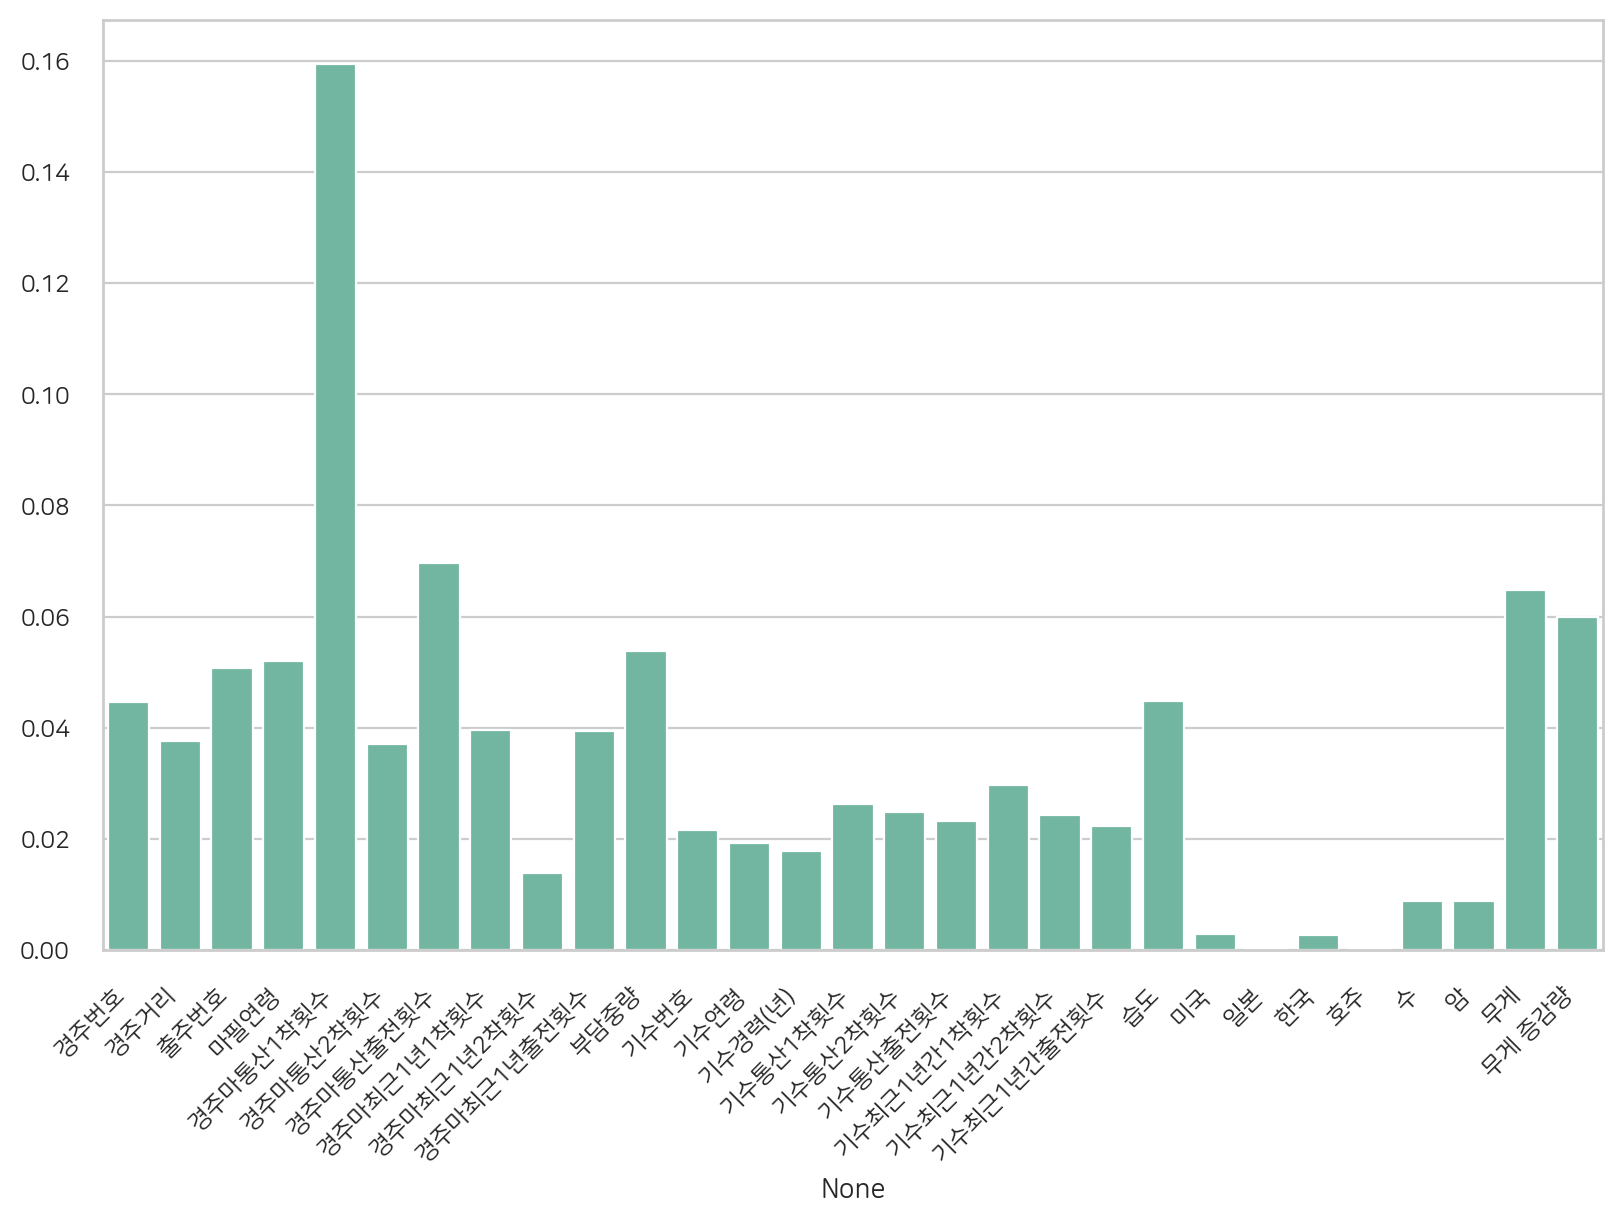

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
    
sns.barplot(x=x_data.columns, y=model.feature_importances_, ax= ax)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45);
plt.savefig("00_proto_result.png")